# Neural Network

In [4]:
from keras.src.callbacks import early_stopping
from sklearn.metrics import (matthews_corrcoef, confusion_matrix,
                             classification_report, ConfusionMatrixDisplay)
from joblib import dump
from ucimlrepo import fetch_ucirepo
import tensorflow as tf
from tensorflow.keras.datasets import mnist
from tensorflow.keras import Sequential, regularizers, callbacks
from tensorflow.keras.layers import InputLayer, Flatten, Dense, Dropout
from tensorflow.keras.callbacks import EarlyStopping
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import utils
import keras
import keras_tuner
from keras import layers, regularizers

covertype = fetch_ucirepo(id=31)

X = covertype.data.features
y = covertype.data.targets
y = y - 1  # make classes 0-7 instead of 1-8

### Clean, Balance, and Split Data

In [5]:
# preprocess data using utils.py
X_clean, y_clean = utils.clean_data(X, y)

X_train, X_test, y_train, y_test = utils.split_data(X_clean, y_clean)

# X_train, y_train = utils.normalize_data(X_train, y_train)
#X_train, y_train = utils.naive_undersample_data(X_trainA, y_trainA)


# create a validation set
validation_ratio = 0.1

X_train, X_val, y_train, y_val = utils.split_data(X_train, y_train, validation_ratio)

## Create Model

### Keras Tuner

In [3]:
def build_keras_model(hp):
    model = keras.Sequential()
    model.add(keras.layers.InputLayer(input_shape=(54,1)))
    model.add(keras.layers.Flatten())
    model.add(keras.layers.Dense(
                  hp.Choice('units', [16, 32, 64, 128, 256, 512, 1024]),
                  activation='relu',
                  kernel_regularizer=keras.regularizers.l2(0.01)
              ))
    model.add(keras.layers.Dense(
                  hp.Choice('units', [16, 32, 64, 128, 256, 512, 1024]),
                  activation='relu',
                  kernel_regularizer=keras.regularizers.l2(0.01)
              ))
    model.add(keras.layers.Dense(
                  hp.Choice('units', [16, 32, 64, 128, 256, 512, 1024]),
                  activation='relu',
                  kernel_regularizer=keras.regularizers.l2(0.01)
              ))
    model.add(keras.layers.Dense(7, activation='softmax'))
    model.compile(
        optimizer=tf.keras.optimizers.Adam(learning_rate=0.0005),
        loss='sparse_categorical_crossentropy',
        metrics=['accuracy'],
    )
    return model


In [4]:
build_keras_model(keras_tuner.HyperParameters())

C:\Users\Kills\miniconda3\Lib\site-packages\keras\src\layers\core\input_layer.py:27: UserWarning: Argument `input_shape` is deprecated. Use `shape` instead.
  warnings.warn(


<Sequential name=sequential, built=True>

In [5]:
tuner = keras_tuner.GridSearch(
    hypermodel = build_keras_model,
    objective='val_loss',
    max_trials=100,
    overwrite=True,
)

#### Tune Keras Model

In [6]:
tuner.search(X_train, y_train, epochs=15, validation_data=(X_val, y_val))

Trial 1 Complete [00h 00m 16s]
val_loss: 1.4015361070632935

Best val_loss So Far: 1.4015361070632935
Total elapsed time: 00h 00m 16s

Search: Running Trial #2

Value             |Best Value So Far |Hyperparameter
32                |16                |units

Epoch 1/15


C:\Users\Kills\miniconda3\Lib\site-packages\keras\src\layers\core\input_layer.py:27: UserWarning: Argument `input_shape` is deprecated. Use `shape` instead.
  warnings.warn(


433/433 ━━━━━━━━━━━━━━━━━━━━ 3s 3ms/step - accuracy: 0.2255 - loss: 20.8894 - val_accuracy: 0.2632 - val_loss: 7.4411
Epoch 2/15
433/433 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.2959 - loss: 6.0489 - val_accuracy: 0.2917 - val_loss: 4.6991
Epoch 3/15
433/433 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.3416 - loss: 4.5824 - val_accuracy: 0.3925 - val_loss: 4.0492
Epoch 4/15
433/433 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.3835 - loss: 3.5961 - val_accuracy: 0.3931 - val_loss: 3.8632
Epoch 5/15
433/433 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.4047 - loss: 3.2083 - val_accuracy: 0.4146 - val_loss: 3.1070
Epoch 6/15
433/433 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.4309 - loss: 2.9223 - val_accuracy: 0.3652 - val_loss: 3.0262
Epoch 7/15
433/433 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.4511 - loss: 2.7110 - val_accuracy: 0.4561 - val_loss: 2.4545
Epoch 8/15
433/433 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.4672 - loss: 2.5039 - val_accuracy: 0.5029 - val

KeyboardInterrupt: 

In [6]:
from joblib import dump, load
model = load('../data/best_neural_network2.joblib')

C:\Users\Aidan\Documents\pythonschool\Lib\site-packages\keras\src\saving\saving_lib.py:797: UserWarning: Skipping variable loading for optimizer 'adam', because it has 18 variables whereas the saved optimizer has 2 variables. 
  saveable.load_own_variables(weights_store.get(inner_path))


In [5]:
model = tuner.get_best_models(num_models=3)[0]
tuner.search_space_summary()

NameError: name 'tuner' is not defined

### Manual Model

In [9]:
model = Sequential(
    [
        InputLayer(input_shape=(54,1)),
        Flatten(),
        Dense(512, activation='relu'),
        Dense(512, activation='relu'),
        Dense(512, activation='relu'),
        Dense(512, activation='relu'),
        Dense(7, activation='softmax')
    ]
)

In [10]:
model.compile(
    optimizer=tf.keras.optimizers.Adam(learning_rate=0.00025),
    loss="sparse_categorical_crossentropy",
    metrics=["accuracy"]
)

### Train Best Model

In [11]:
model.summary()

Model: "sequential_2"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ flatten_2 (Flatten)             │ (None, 54)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_8 (Dense)                 │ (None, 512)            │        28,160 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_9 (Dense)                 │ (None, 512)            │       262,656 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_10 (Dense)                │ (None, 512)            │       262,656 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_11 (Dense)                │ (None, 512)            │       262,656 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_12 (Dense)                │ (None, 7)              │         3,591 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 819,719 (3.13 MB)

 Trainable params: 819,719 (3.13 MB)

 Non-trainable params: 0 (0.00 B)

In [12]:
# retrain on best parameters
early_stopping = callbacks.EarlyStopping(monitor='val_loss', patience=15, restore_best_weights=True)

fitted = model.fit(
    X_train, y_train,
    validation_data=(X_val, y_val),
    epochs=400,
    batch_size=128,
    verbose=1,
    callbacks = [early_stopping]
)

Epoch 1/400
3269/3269 ━━━━━━━━━━━━━━━━━━━━ 27s 8ms/step - accuracy: 0.6091 - loss: 1.5487 - val_accuracy: 0.6785 - val_loss: 0.7477
Epoch 2/400
3269/3269 ━━━━━━━━━━━━━━━━━━━━ 57s 18ms/step - accuracy: 0.6982 - loss: 0.7004 - val_accuracy: 0.7209 - val_loss: 0.6558
Epoch 3/400
3269/3269 ━━━━━━━━━━━━━━━━━━━━ 30s 9ms/step - accuracy: 0.7277 - loss: 0.6226 - val_accuracy: 0.7389 - val_loss: 0.5880
Epoch 4/400
3269/3269 ━━━━━━━━━━━━━━━━━━━━ 324s 99ms/step - accuracy: 0.7569 - loss: 0.5574 - val_accuracy: 0.7727 - val_loss: 0.5191
Epoch 5/400
3269/3269 ━━━━━━━━━━━━━━━━━━━━ 112s 34ms/step - accuracy: 0.7865 - loss: 0.4909 - val_accuracy: 0.7981 - val_loss: 0.4662
Epoch 6/400
3269/3269 ━━━━━━━━━━━━━━━━━━━━ 42s 13ms/step - accuracy: 0.8121 - loss: 0.4359 - val_accuracy: 0.8243 - val_loss: 0.4107
Epoch 7/400
3269/3269 ━━━━━━━━━━━━━━━━━━━━ 52s 16ms/step - accuracy: 0.8322 - loss: 0.3912 - val_accuracy: 0.8403 - val_loss: 0.3752
Epoch 8/400
3269/3269 ━━━━━━━━━━━━━━━━━━━━ 48s 15ms/step - accuracy: 

 ## Visualizations

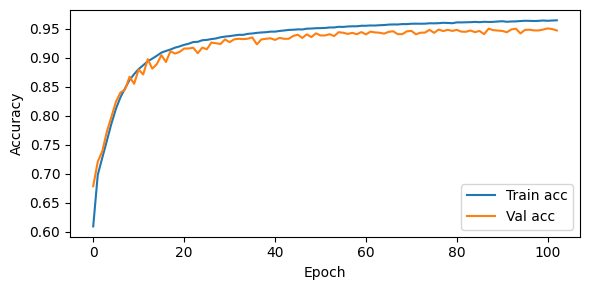

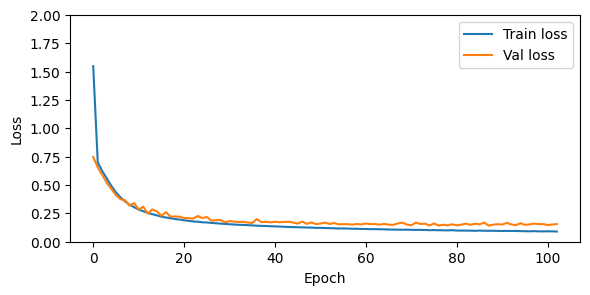

In [15]:
plt.figure(figsize=(6,3))
plt.plot(fitted.history["accuracy"], label="Train acc")
plt.plot(fitted.history["val_accuracy"], label="Val acc")
plt.xlabel("Epoch"); plt.ylabel("Accuracy"); plt.legend(); plt.tight_layout()
plt.show()

plt.figure(figsize=(6,3))
plt.plot(fitted.history["loss"], label="Train loss")
plt.plot(fitted.history["val_loss"], label="Val loss")
plt.xlabel("Epoch"); plt.ylabel("Loss"); plt.legend(); plt.tight_layout()
axes = plt.gca()
axes.set_ylim([0, 2])
plt.show()

## Results

3632/3632 ━━━━━━━━━━━━━━━━━━━━ 4s 1ms/step
Test MCC: 0.9229770818701454

Confusion Matrix:
[[39981  2226     0     0    39     3   119]
 [ 1587 54729    82     2   163    71    27]
 [    0   114  6750    55    13   219     0]
 [    0     1    43   469     0    36     0]
 [   27   223    14     0  1628     7     0]
 [    5    94   151    15     7  3201     0]
 [  201    25     0     0     0     0  3876]]

Classification Report:
              precision    recall  f1-score   support

           0       0.96      0.94      0.95     42368
           1       0.95      0.97      0.96     56661
           2       0.96      0.94      0.95      7151
           3       0.87      0.85      0.86       549
           4       0.88      0.86      0.87      1899
           5       0.91      0.92      0.91      3473
           6       0.96      0.94      0.95      4102

    accuracy                           0.95    116203
   macro avg       0.93      0.92      0.92    116203
weighted avg       0.95    

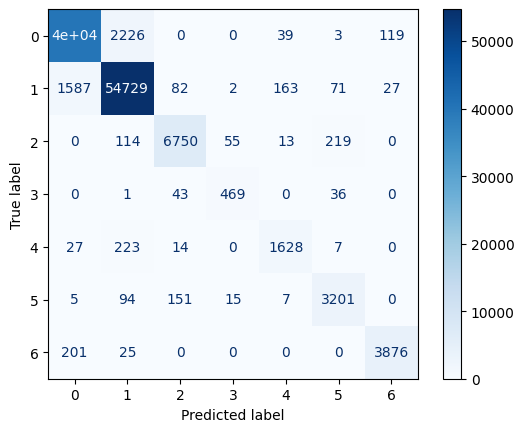

In [16]:
# See how our model does on the test set

# TODO: deal with softmax to a prediction and fix model rigidness.
# todo: categorize using sklearn on the y_true
y_predicted = model.predict(X_test)

# take argmax of y_predicted to find what it predicted
y_pred_idx = [np.argmax(row) for row in y_predicted]

test_mcc = matthews_corrcoef(y_test, y_pred_idx)
print("Test MCC:", test_mcc)

print("\nConfusion Matrix:")
print(confusion_matrix(y_test, y_pred_idx))

print("\nClassification Report:")
print(classification_report(y_test, y_pred_idx))

ConfusionMatrixDisplay.from_predictions(y_test, y_pred_idx, cmap="Blues")
plt.show()

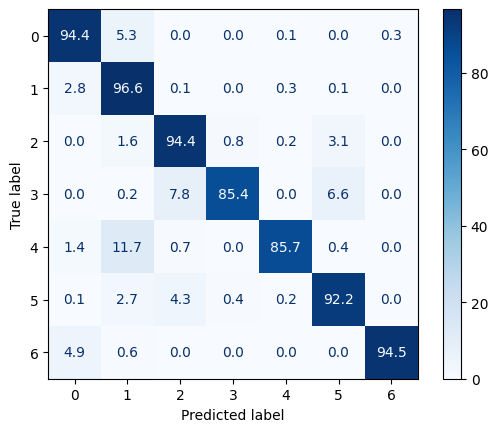

In [18]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
import numpy as np

cm = confusion_matrix(y_test, y_pred_idx, normalize='true')  

cm_percent = cm * 100

disp = ConfusionMatrixDisplay(confusion_matrix=cm_percent)
disp.plot(cmap='Blues', values_format=".1f") 


In [19]:
# dump model
dump(model, "../data/best_neural_network_1.joblib")

['../data/best_neural_network_1.joblib']

In [6]:
import numpy as np
from sklearn.utils.class_weight import compute_class_weight

classes = np.unique(y_train)
weights = compute_class_weight(class_weight="balanced", classes=classes, y=y_train)
class_weights = dict(zip(classes, weights))

class_weights

{np.int64(0): np.float64(0.39181211510993513),
 np.int64(1): np.float64(0.2929812470934956),
 np.int64(2): np.float64(2.3214521562033505),
 np.int64(3): np.float64(30.21291347681641),
 np.int64(4): np.float64(8.743400564322291),
 np.int64(5): np.float64(4.779362032720958),
 np.int64(6): np.float64(4.046938637309058)}

In [ ]:
model = Sequential(
    [
        InputLayer(input_shape=(54,1)),
        Flatten(),
        Dense(512, activation='relu'),
        Dense(512, activation='relu'),
        Dense(512, activation='relu'),
        Dense(512, activation='relu'),
        Dense(7, activation='softmax')
    ]
)

model.compile(
    optimizer=tf.keras.optimizers.Adam(learning_rate=0.00005),
    loss="sparse_categorical_crossentropy",
    metrics=["accuracy"]
)

early_stopping = callbacks.EarlyStopping(monitor='val_loss', patience=40, restore_best_weights=True)



c:\School\repositories\CSCI635\.venv\Lib\site-packages\keras\src\layers\core\input_layer.py:27: UserWarning: Argument `input_shape` is deprecated. Use `shape` instead.
  warnings.warn(


In [11]:
fitted = model.fit(
    X_train, y_train,
    validation_data=(X_val, y_val),
    epochs=300,
    batch_size=128,
    verbose=1,
    class_weight=class_weights,
    callbacks = [early_stopping]
)

Epoch 1/300
3269/3269 ━━━━━━━━━━━━━━━━━━━━ 20s 6ms/step - accuracy: 0.3959 - loss: 2.5789 - val_accuracy: 0.4720 - val_loss: 1.8532
Epoch 2/300
3269/3269 ━━━━━━━━━━━━━━━━━━━━ 19s 6ms/step - accuracy: 0.4817 - loss: 1.3458 - val_accuracy: 0.3868 - val_loss: 2.0728
Epoch 3/300
3269/3269 ━━━━━━━━━━━━━━━━━━━━ 20s 6ms/step - accuracy: 0.5316 - loss: 0.9942 - val_accuracy: 0.4792 - val_loss: 1.3929
Epoch 4/300
3269/3269 ━━━━━━━━━━━━━━━━━━━━ 21s 7ms/step - accuracy: 0.5692 - loss: 0.7997 - val_accuracy: 0.5176 - val_loss: 1.2089
Epoch 5/300
3269/3269 ━━━━━━━━━━━━━━━━━━━━ 21s 6ms/step - accuracy: 0.5949 - loss: 0.6994 - val_accuracy: 0.6119 - val_loss: 0.9216
Epoch 6/300
3269/3269 ━━━━━━━━━━━━━━━━━━━━ 21s 6ms/step - accuracy: 0.6116 - loss: 0.6372 - val_accuracy: 0.6511 - val_loss: 0.8015
Epoch 7/300
3269/3269 ━━━━━━━━━━━━━━━━━━━━ 20s 6ms/step - accuracy: 0.6331 - loss: 0.5842 - val_accuracy: 0.6837 - val_loss: 0.7304
Epoch 8/300
3269/3269 ━━━━━━━━━━━━━━━━━━━━ 20s 6ms/step - accuracy: 0.6482 -

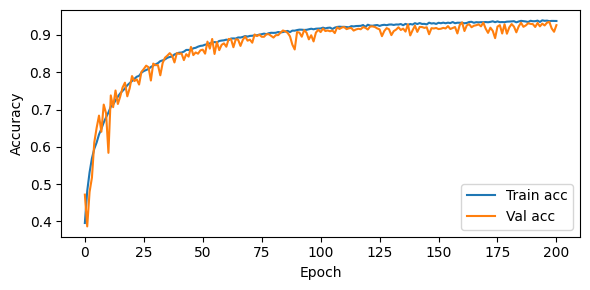

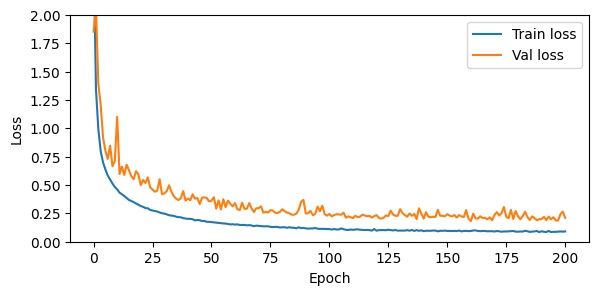

In [13]:
plt.figure(figsize=(6,3))
plt.plot(fitted.history["accuracy"], label="Train acc")
plt.plot(fitted.history["val_accuracy"], label="Val acc")
plt.xlabel("Epoch"); plt.ylabel("Accuracy"); plt.legend(); plt.tight_layout()
plt.show()

plt.figure(figsize=(6,3))
plt.plot(fitted.history["loss"], label="Train loss")
plt.plot(fitted.history["val_loss"], label="Val loss")
plt.xlabel("Epoch"); plt.ylabel("Loss"); plt.legend(); plt.tight_layout()
axes = plt.gca()
axes.set_ylim([0, 2])
plt.show()

3632/3632 ━━━━━━━━━━━━━━━━━━━━ 4s 1ms/step
Test MCC: 0.8958882742795935

Confusion Matrix:
[[39758  2241     2     0    99     9   259]
 [ 3010 52410   285     2   619   276    59]
 [    0    34  6831    73    23   190     0]
 [    0     0    30   492     0    27     0]
 [    6    60     5     0  1816    12     0]
 [    1    14   134    35    10  3279     0]
 [  103    12     0     0     1     0  3986]]

Classification Report:
              precision    recall  f1-score   support

           0       0.93      0.94      0.93     42368
           1       0.96      0.92      0.94     56661
           2       0.94      0.96      0.95      7151
           3       0.82      0.90      0.85       549
           4       0.71      0.96      0.81      1899
           5       0.86      0.94      0.90      3473
           6       0.93      0.97      0.95      4102

    accuracy                           0.93    116203
   macro avg       0.88      0.94      0.91    116203
weighted avg       0.94    

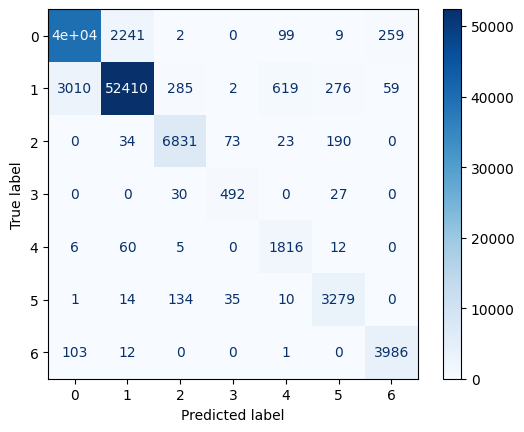

In [14]:

y_predicted = model.predict(X_test)

y_pred_idx = [np.argmax(row) for row in y_predicted]

test_mcc = matthews_corrcoef(y_test, y_pred_idx)
print("Test MCC:", test_mcc)

print("\nConfusion Matrix:")
print(confusion_matrix(y_test, y_pred_idx))

print("\nClassification Report:")
print(classification_report(y_test, y_pred_idx))

ConfusionMatrixDisplay.from_predictions(y_test, y_pred_idx, cmap="Blues")
plt.show()

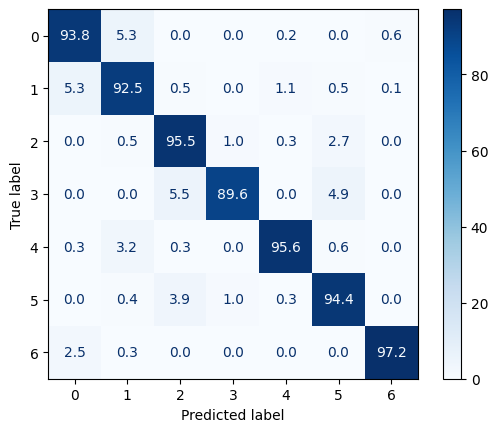

In [15]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
import numpy as np

cm = confusion_matrix(y_test, y_pred_idx, normalize='true')  

cm_percent = cm * 100

disp = ConfusionMatrixDisplay(confusion_matrix=cm_percent)
disp.plot(cmap='Blues', values_format=".1f") 


In [16]:
dump(model, "../data/class_weight_neural_network_1.joblib")

['../data/class_weight_neural_network_1.joblib']